# Backpropagation Algorithm

Let's assume we have the following single-layer network:

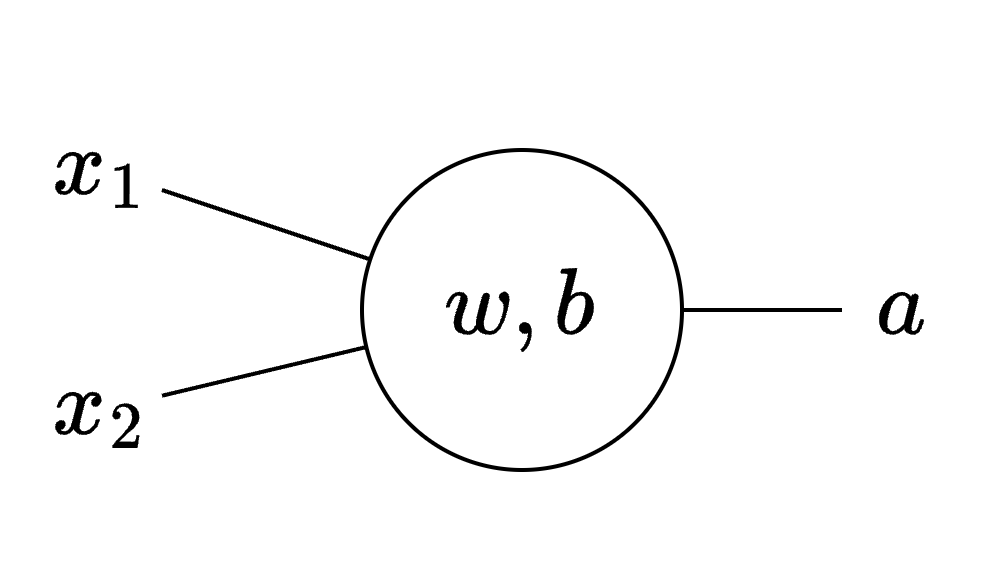

We know the computation this graph represents is:

$a = g(z)$

where

$z = \boldsymbol w \cdot \boldsymbol x + b$

Assume this neural network is being used for regression, so we
choose $g$ to be the identity function ($g(z)=z$) and we choose the loss
function to the the mean squared error loss function:

$L(\hat y, y) = \frac{1}{2}(\hat y - y)^2$

This means we can view the neural network above as a computational graph:

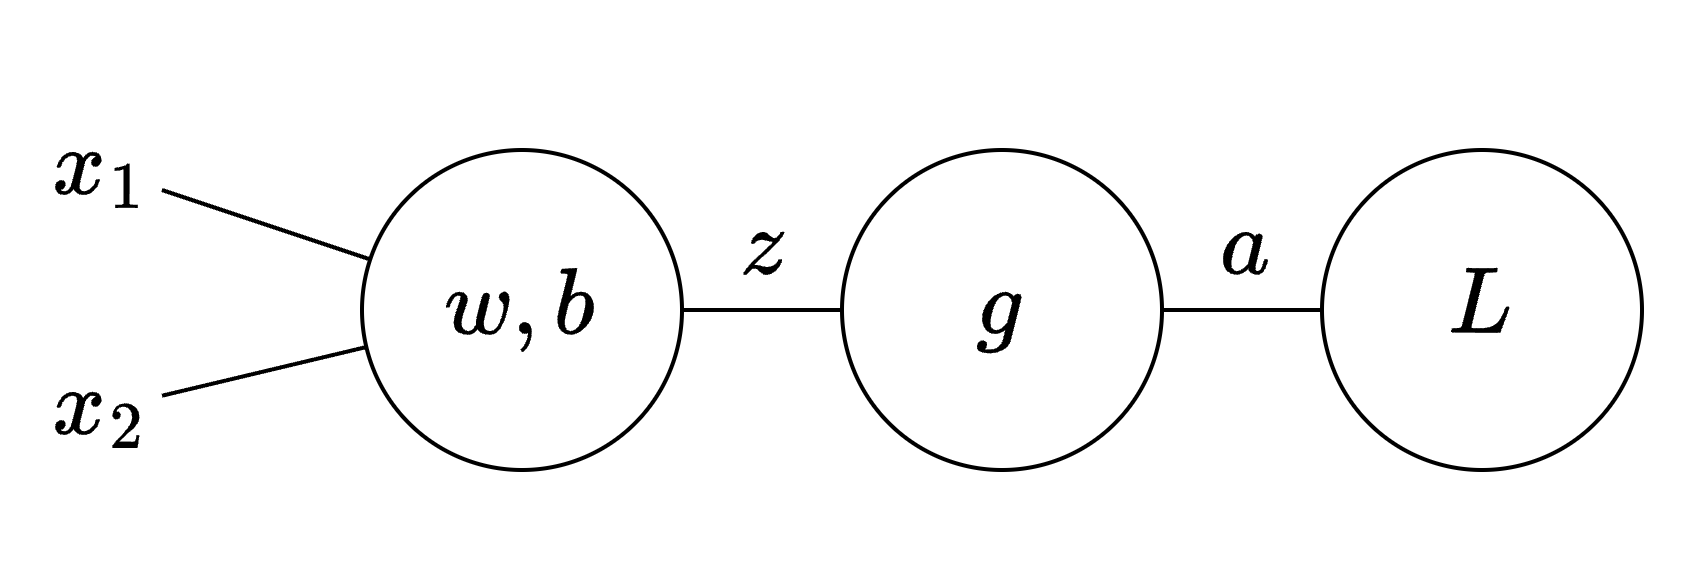

To make the neural network act like we want it to, we will need to perform gradient descent
to find the correct values for $\boldsymbol{w}$ and $b$.  We do this by finding the partial
derivatives of $L$ with respect to $w_1$, $w_2$, and $b$.

Let's first write out all the computations in expanded form (no dot products) from left to right:

$z = w_1 \cdot x_1 + w_2 \cdot x_2 + b$

$a = g(z) = z$

$L(a, y) = \frac{1}{2}(a - y)^2$  $\qquad$ (remember we define $\hat y=f(\boldsymbol{x})=a$)

Now let's take the partial derivative of each piece with respect to the previous variable, working
backwards:

$\dfrac{\partial L}{\partial a} = (a-y)$

$\dfrac{\partial a}{\partial z} = 1$

$\dfrac{\partial z}{\partial w_1} = x_1 \qquad \text{also} \ \dfrac{\partial z}{\partial w_2} = x_2 
  \ \text{ and }  \ \dfrac{\partial z}{\partial b} = 1$

Multiplying, we get:

$\dfrac{\partial L}{\partial w_1} = \dfrac{\partial L}{\partial a} \cdot
 \dfrac{\partial a}{\partial z} \cdot \dfrac{\partial z}{\partial w_1} = 
 (a-y) \cdot 1 \cdot x_1 = (a-y)x_1$

Similarly, we also get:

$\dfrac{\partial L}{\partial w_2} = 
 (a-y) \cdot 1 \cdot x_2 = (a-y)x_2$

and 

$\dfrac{\partial L}{\partial b} = 
 (a-y) \cdot 1\cdot 1 = a-y$

## Gradient descent

In gradient descent, we need the derivative of the **cost** function rather than the **loss** function.
But remember that the cost function is defined to be the average loss over all the training examples:

$$J(\boldsymbol{w}, b) = \dfrac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$$

So we want $$\dfrac{\partial}{\partial w_1} J(\boldsymbol{w}, b)
= \dfrac{\partial}{\partial w_1} \dfrac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})
= \dfrac{1}{m}\sum_{i=1}^m \dfrac{\partial}{\partial w_1} L(\hat{y}^{(i)}, y^{(i)})
$$

where

$$\dfrac{\partial}{\partial w_1} L(\hat{y}, y) = (a-y)x_1$$

We can do similar computations for $w_2$ and $b$.

## 2-layer network

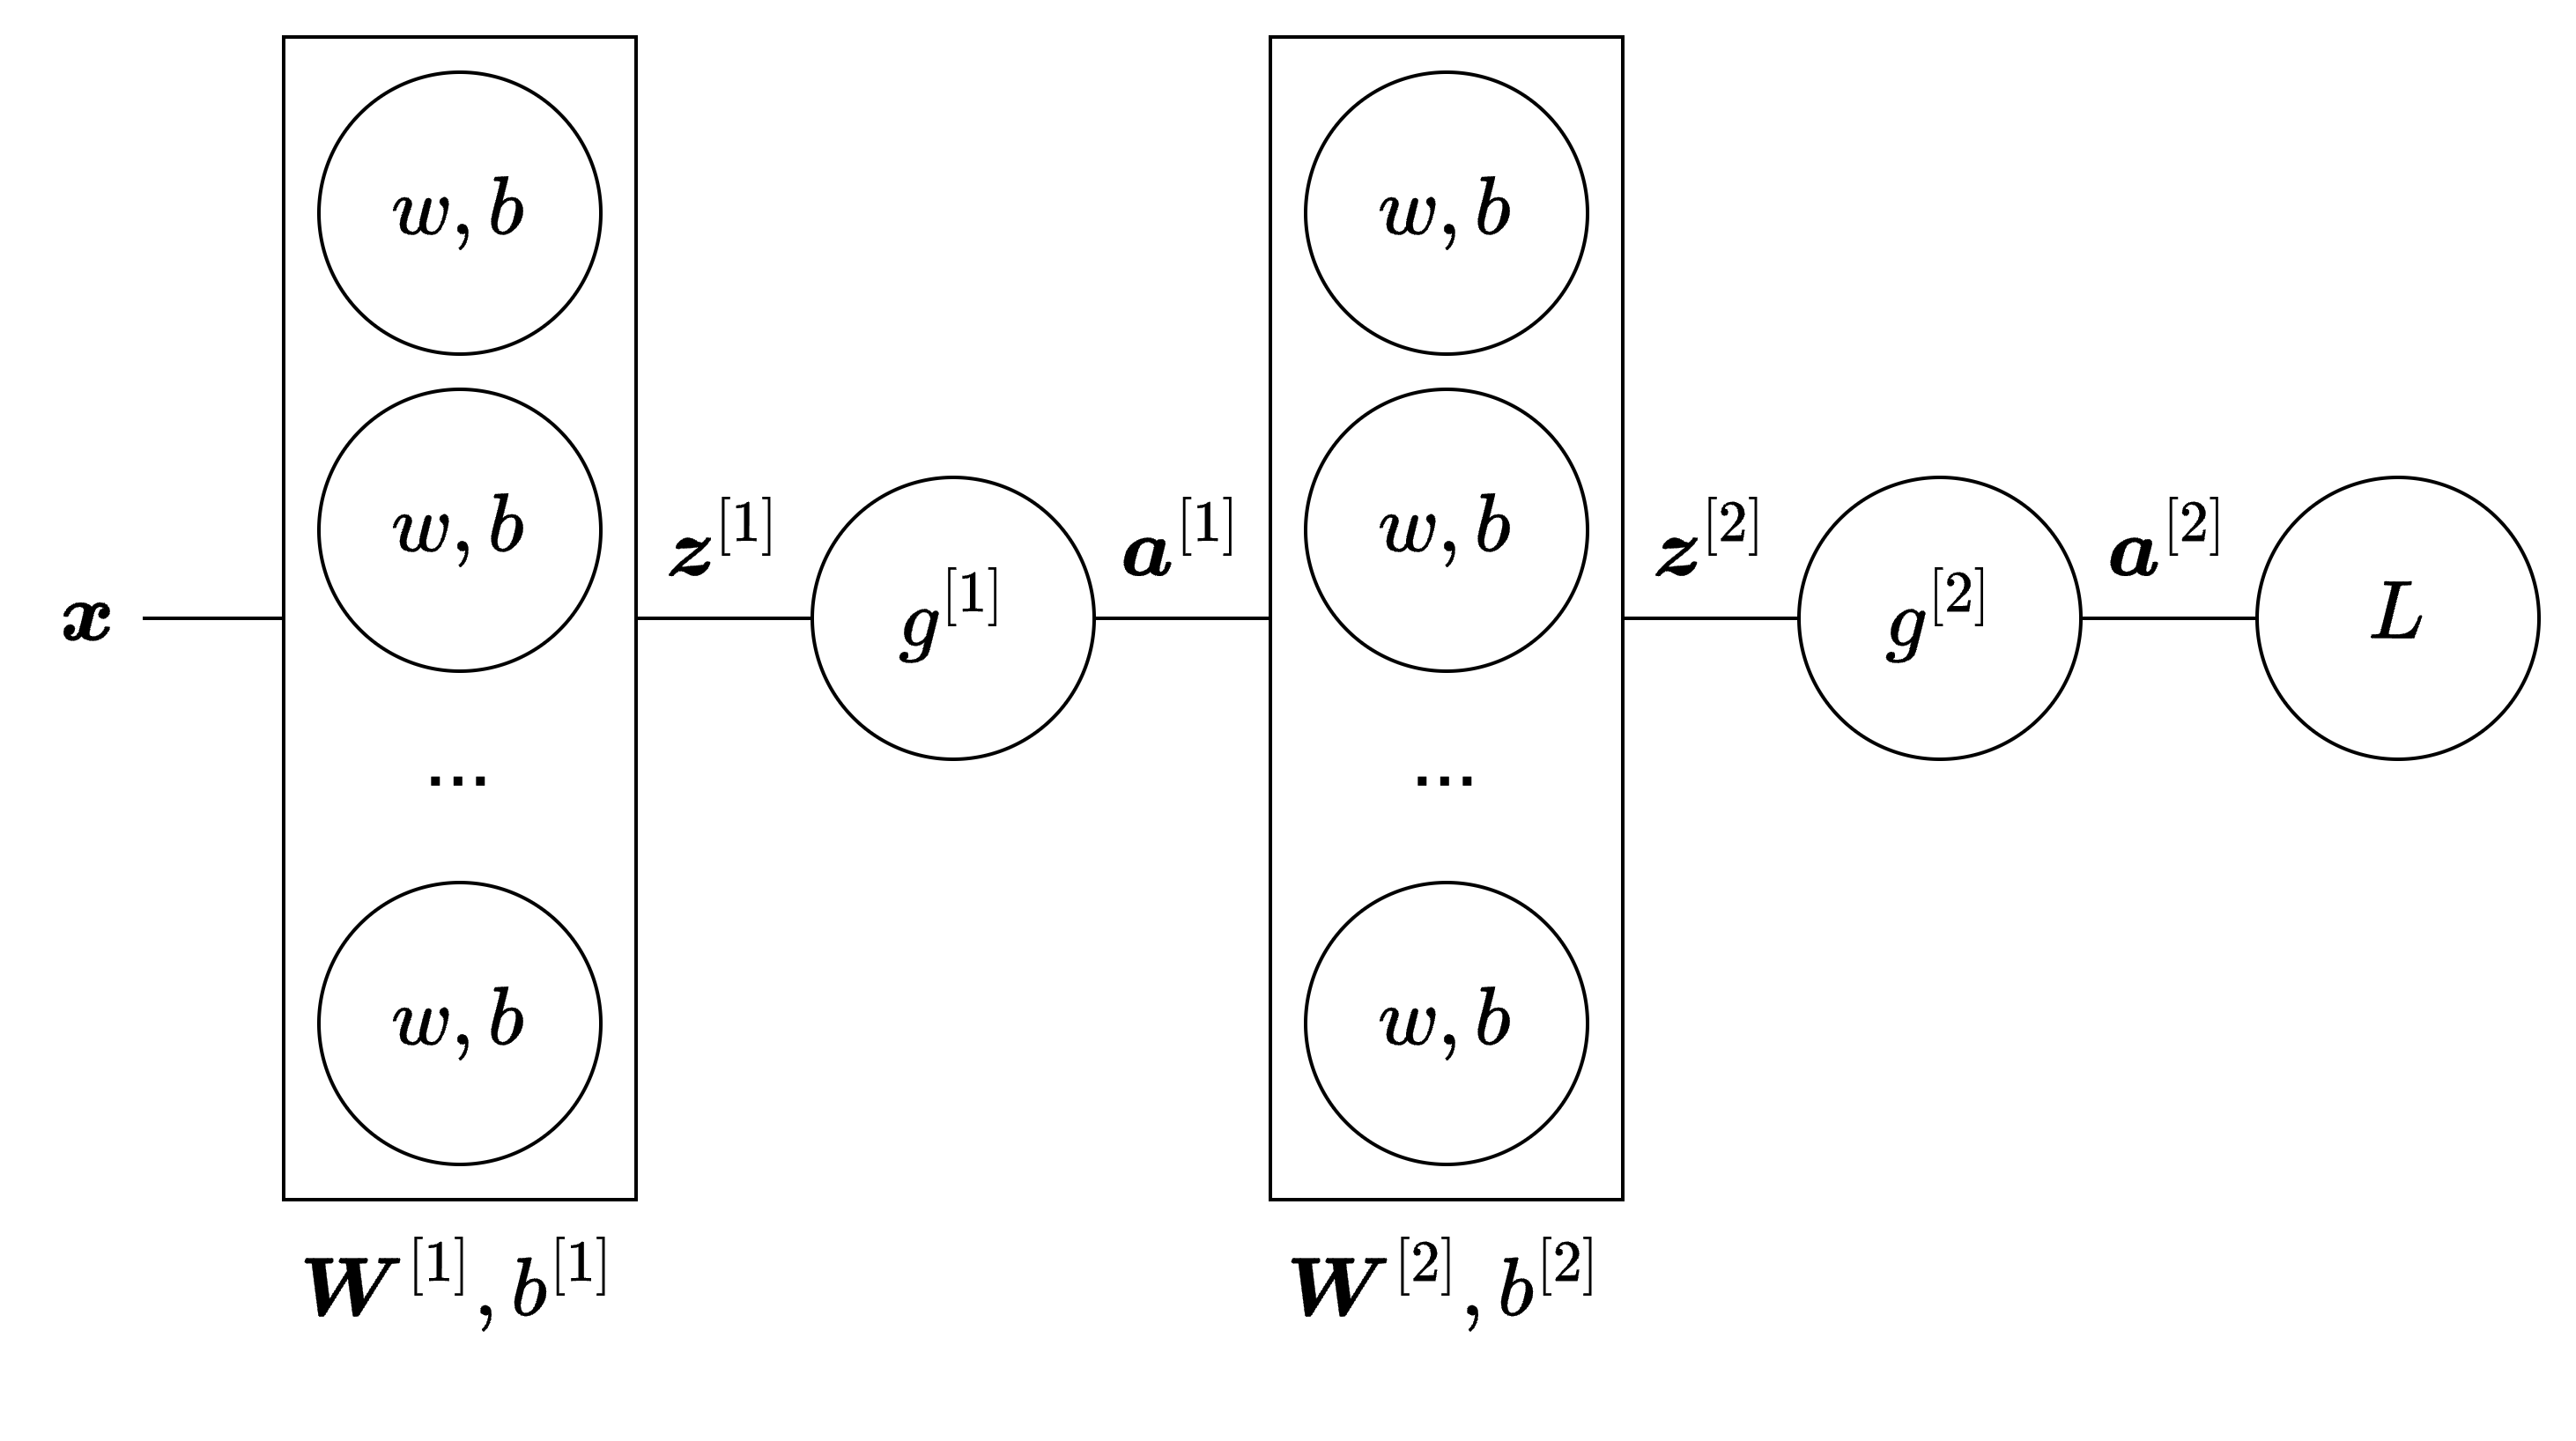

As before, the last activation function, $g^{[2]}$ is the identity function, 
since we are doing regression.  Let's assume the other activation function,
$g^{[2]}$, is ReLU.

Also, our loss function is mean squared error like before.

### Forward pass:

$\boldsymbol{z}^{[1]} = x  W^{[1]} + b^{[1]}$

$\boldsymbol{a}^{[1]} = g^{[1]}(\boldsymbol z^{[1]})$

$\boldsymbol{z}^{[2]} = \boldsymbol{a}^{[1]} W^{[2]} + b^{[2]}$

$\boldsymbol{a}^{[2]} = g^{[2]}(\boldsymbol z^{[2]})$

$L(\hat y, y) = \frac{1}{2}(\hat y-y)^2$

### Calculating partial derivatives:

$\dfrac{\partial L}{\partial \boldsymbol{a}^{[2]}} = (\boldsymbol{a}^{[2]}-y)$

$\dfrac{\partial \boldsymbol{a}^{[2]}}{\partial \boldsymbol{z}^{[2]}}=1$

$\dfrac{\partial \boldsymbol{z}^{[2]}}{\partial \boldsymbol{a}^{[1]}}=\boldsymbol{W}^{[2]}$

$\dfrac{\partial \boldsymbol{a}^{[1]}}{\partial \boldsymbol{z}^{[1]}}=\text{ReLU}'(\boldsymbol{z}^{[1]})$


$\dfrac{\partial \boldsymbol{z}^{[1]}}{\partial \boldsymbol{W}^{[1]}}=\boldsymbol{x}$

### Putting it all together:

$\dfrac{\partial L}{\partial \boldsymbol{W}^{[2]}}
= \boldsymbol{a}^{[1]T}\cdot(\boldsymbol{a}^{[2]}-y)$

$\dfrac{\partial L}{\partial b^{[2]}}
= \displaystyle\sum(\boldsymbol{a}^{[2]}-y)$

$\dfrac{\partial L}{\partial \boldsymbol{W}^{[1]}}
= \boldsymbol{x}^{T}\cdot(\boldsymbol{a}^{[2]}-y)
\cdot [\boldsymbol W^{[2]T} \odot \text{ReLU}'(\boldsymbol{z^{[1]}})]$

$\dfrac{\partial L}{\partial b^{[1]}}
= \displaystyle \sum\left[  (\boldsymbol{a}^{[2]}-y)
\cdot [\boldsymbol W^{[2]T} \odot \text{ReLU}'(\boldsymbol{z^{[1]}})] \right]$

<!-- np.atleast_2d(a2 - y) @ W2.T * ((z1 > 0).astype(int)) -->